In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.drop(columns='User ID',axis=0,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoding=LabelEncoder()

In [ ]:
df['Gender']=label_encoding.fit_transform(df['Gender'])

In [ ]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


[]

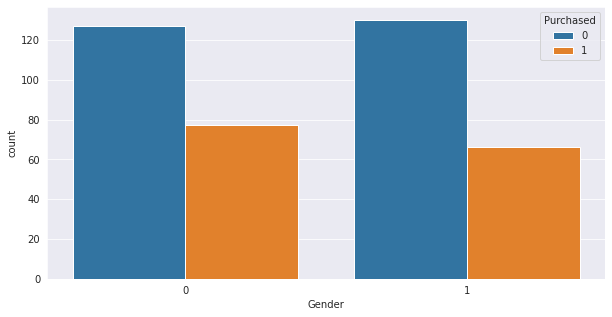

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=df,hue='Purchased')
sns.set_style('darkgrid')
plt.plot()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaler.fit(df.drop('Purchased',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X=scaler.transform(df.drop('Purchased',axis=1))

In [ ]:
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [ ]:
y=df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_Knn=KNeighborsClassifier()

In [ ]:
model_Knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred=model_Knn.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred))

Accuracy_Score : 0.9166666666666666


In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[73,  6],
       [ 4, 37]])

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



In [ ]:
error_rate=[]
for i in range(1,40):
  model_Knn=KNeighborsClassifier(n_neighbors=i)
  model_Knn.fit(X_train,y_train)
  pred_i=model_Knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

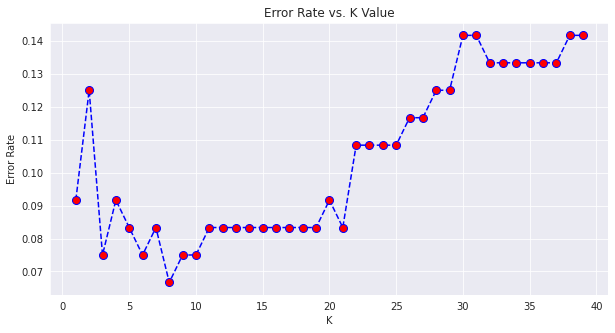

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
  model_Knn=KNeighborsClassifier(n_neighbors=7)
  model_Knn.fit(X_train,y_train)
  pred_i=model_Knn.predict(X_test)
  

In [ ]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
print(metrics.classification_report(y_test,y_pred))

Accuracy_Score : 0.9166666666666666
[[73  6]
 [ 4 37]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



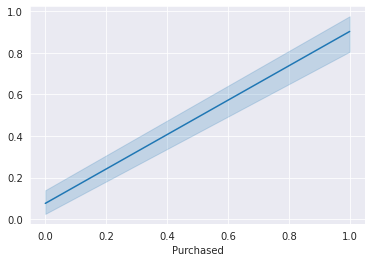

In [ ]:
sns.lineplot(x=y_test,y=y_pred)